In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

In [77]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices de resumo do nome das CBOs para :
cbo = {'1236': '1236 - Diretoria', '1425': '1425 - Gerência', 
       '2122': '2122 - Engenharia', '2123': '2123 - Analistas', 
       '2124': '2124 - Técnicos', '3171': '3171 - Suporte', 
       '3172': '3172 - Administradores'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

In [78]:

#Leitura da tabela de dados gerais:
RAIS_GERAL_2022 = pd.read_csv("C:/Users/victo/2022/estagio/estagio/data/raw/DATA_RAIS_GERAL_2022.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2022.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [79]:
# Convertendo a coluna CBO de int64 para string
RAIS_GERAL_2022['CBO'] = RAIS_GERAL_2022['CBO'].apply(str)

# Extraindo somente os 4 primeiros caracteres (Família CBO)
RAIS_GERAL_2022['CBO'] = RAIS_GERAL_2022["CBO"].str[0:4]

In [80]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2022
fator_correcao_inflacao_2022 = 1.06951750

RAIS_GERAL_2022["Remuneração"] = RAIS_GERAL_2022["Remuneração"] * fator_correcao_inflacao_2022

In [81]:
# Exibindo os cinco primeiros dados da tabela:
RAIS_GERAL_2022.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,3171,82997,1,42,8,"2,363.73",1
1,MS,2124,47113,1,30,2,"3,385.09",1
2,MS,2124,47440,3,38,8,"5,347.59",1
3,MS,2123,38114,4,57,8,"6,135.89",1
4,MS,2123,38114,4,40,8,"3,831.76",1


In [82]:
# Tabela principal para quantidade:
RAIS_GERAL_2022_QNT = pd.crosstab(RAIS_GERAL_2022["CBO"].replace(cbo), RAIS_GERAL_2022["Sexo"].replace(sexo))
RAIS_GERAL_2022_QNT.insert(1, "% Fem.", RAIS_GERAL_2022_QNT["Fem."] / (RAIS_GERAL_2022_QNT["Fem."] + RAIS_GERAL_2022_QNT["Masc."]) * 100)
RAIS_GERAL_2022_QNT.insert(3, "% Masc.", RAIS_GERAL_2022_QNT["Masc."] / (RAIS_GERAL_2022_QNT["Fem."] + RAIS_GERAL_2022_QNT["Masc."]) * 100)

RAIS_GERAL_2022_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
CBO,,,,
1236 - Diretoria,509,14.53,2993,85.47
1425 - Gerência,15992,23.02,53482,76.98
2122 - Engenharia,2656,14.35,15851,85.65
2123 - Analistas,7770,20.14,30813,79.86
2124 - Técnicos,91014,21.61,330060,78.39
3171 - Suporte,35579,26.28,99804,73.72
3172 - Administradores,24372,23.57,79029,76.43


In [83]:
# Tabela para gráfico da quantidade:
RAIS_GERAL_2022_QNT["Total"] = RAIS_GERAL_2022_QNT["% Masc."] + RAIS_GERAL_2022_QNT["% Fem."]
RAIS_GERAL_2022_QNT["Ano"] = "2022"

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2022_QNT]).reset_index()

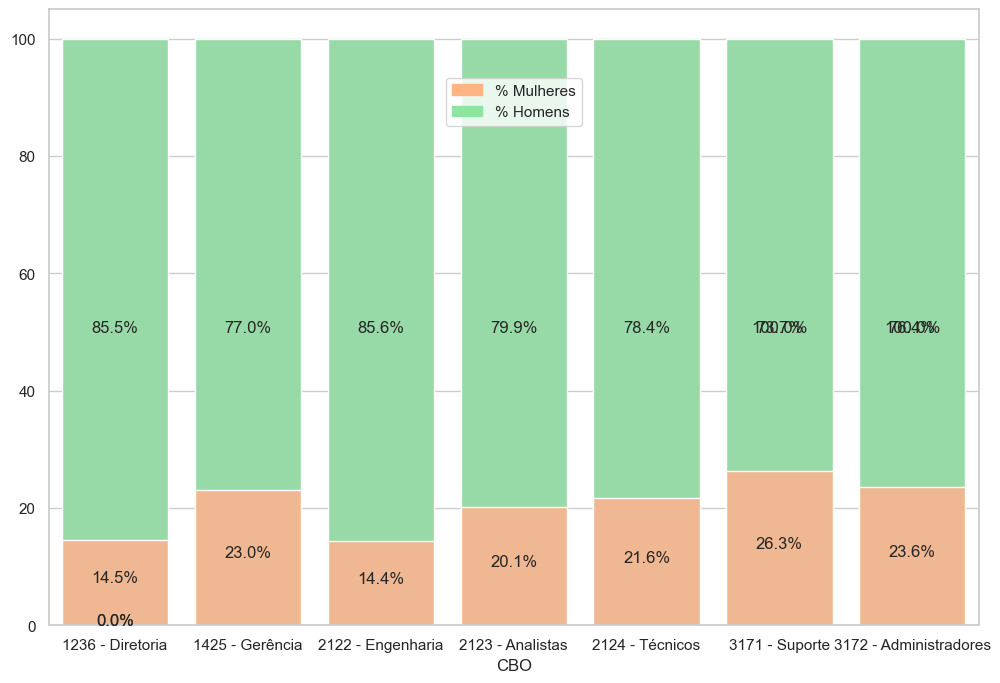

In [84]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize=(12, 8))

# Configuração da grid da imagem:
sns.set(style="whitegrid")

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x="CBO", y="Total", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2022": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i, value in enumerate(RAIS_GERAL_QNT_GRAF["% Masc."]):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar1.annotate('{:.1f}%'.format(value), (x, y), ha='center')

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x="CBO", y="% Fem.", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2022": color_fem})

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color=color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color=color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc='center', bbox_to_anchor=(.45, .8, .1, .1))

# Adicionar rótulos com as porcentagens femininas nas barras
for i in bar2.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    if height < 100.0:
        bar2.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

plt.ylabel('')  # Remover o título do eixo y

plt.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/svg/qnt_sexo_cbo.svg")

In [85]:
# Criação da tabela para o boxplot
RAIS_GERAL_2022_BOX = RAIS_GERAL_2022
RAIS_GERAL_2022_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2022_BOX["CBO"].replace(cbo, inplace = True)

RAIS_GERAL_2022_BOX

C:\Users\victo\AppData\Local\Temp\ipykernel_25644\3217823345.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  RAIS_GERAL_2022_BOX["Sexo"].replace(sexo, inplace = True)
C:\Users\victo\AppData\Local\Temp\ipykernel_25644\3217823345.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,3171 - Suporte,82997,1,42,8,"2,363.73",Masc.
1,MS,2124 - Técnicos,47113,1,30,2,"3,385.09",Masc.
2,MS,2124 - Técnicos,47440,3,38,8,"5,347.59",Masc.
3,MS,2123 - Analistas,38114,4,57,8,"6,135.89",Masc.
4,MS,2123 - Analistas,38114,4,40,8,"3,831.76",Masc.
...,...,...,...,...,...,...,...,...
789919,RS,2124 - Técnicos,62040,11,40,2,"14,726.24",Fem.
789920,RS,2124 - Técnicos,72100,11,39,2,"17,325.30",Fem.
789921,RS,2122 - Engenharia,62015,11,38,2,"12,440.77",Fem.
789922,RS,2124 - Técnicos,74901,11,35,2,"5,240.64",Fem.


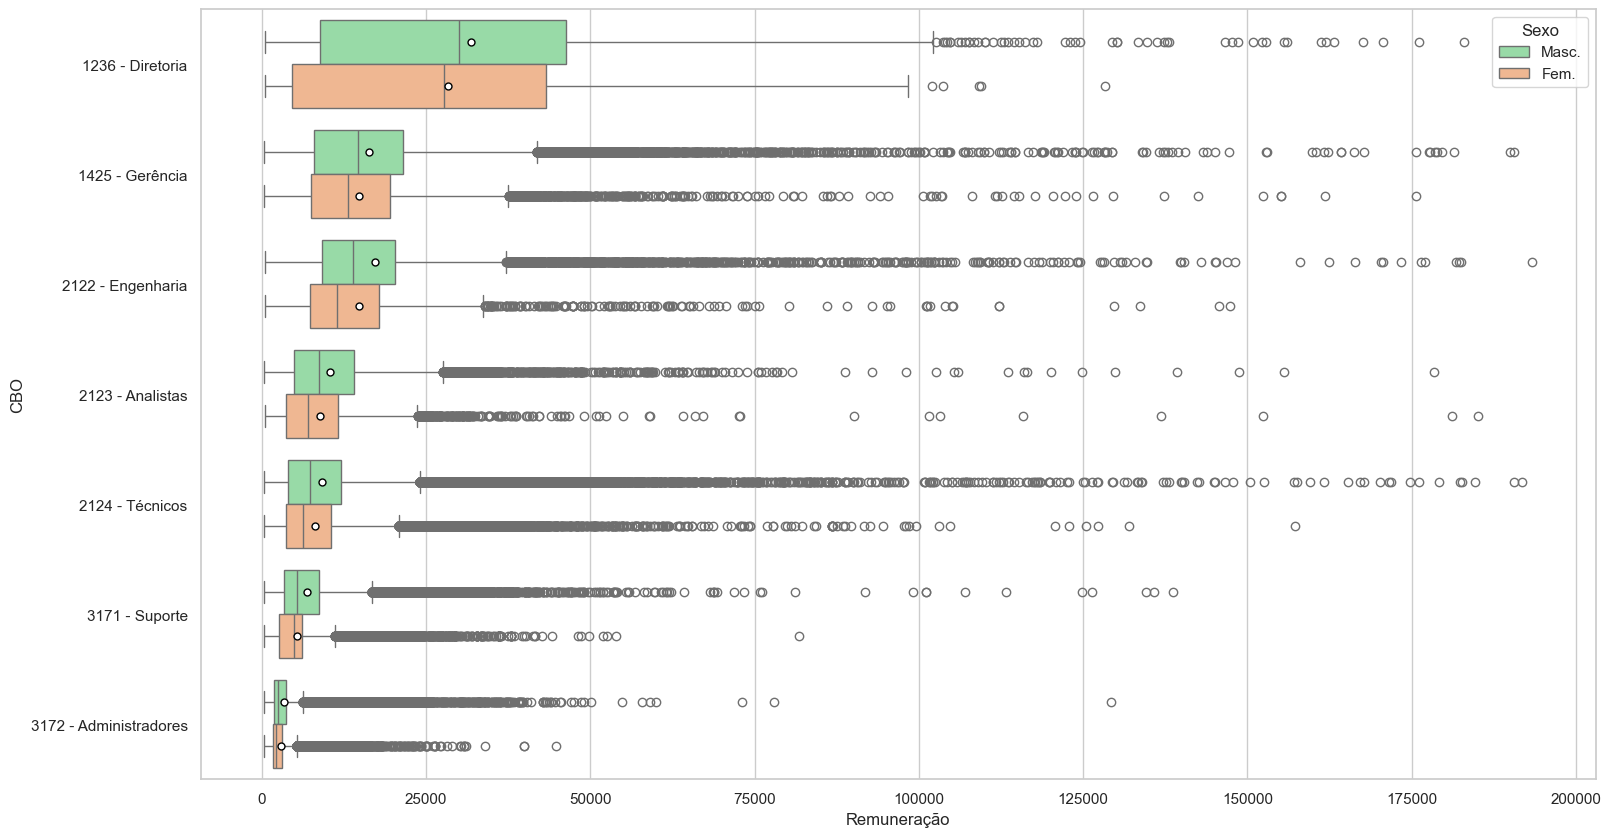

In [86]:

# Criação do boxplot:
box = sns.boxplot(x = 'Remuneração', y = 'CBO', hue = 'Sexo', data = RAIS_GERAL_2022, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = cbo.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(18, 10)
box.figure.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/png/boxplot_sexo_cbo_2022.png", dpi = 300)

In [87]:
# Tabela principal para média e diferença salarial:
RAIS_GERAL_2022_MEDIA = pd.crosstab(RAIS_GERAL_2022["CBO"].replace(cbo), RAIS_GERAL_2022["Sexo"].replace(sexo), values = RAIS_GERAL_2022.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2022_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2022_MEDIA["Fem."] - RAIS_GERAL_2022_MEDIA["Masc."]) / RAIS_GERAL_2022_MEDIA["Masc."]) * 100)

RAIS_GERAL_2022_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1236 - Diretoria,"28,377.25","31,907.80",-11.06
1425 - Gerência,"14,874.00","16,273.63",-8.60
2122 - Engenharia,"14,728.72","17,287.43",-14.80
2123 - Analistas,"8,799.24","10,387.35",-15.29
2124 - Técnicos,"8,089.60","9,114.30",-11.24
3171 - Suporte,"5,386.26","6,892.68",-21.86
3172 - Administradores,"2,863.58","3,353.78",-14.62


In [88]:
RAIS_GERAL_2022_MEDIA["Ano"] = "2022"

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2022_MEDIA]).reset_index()

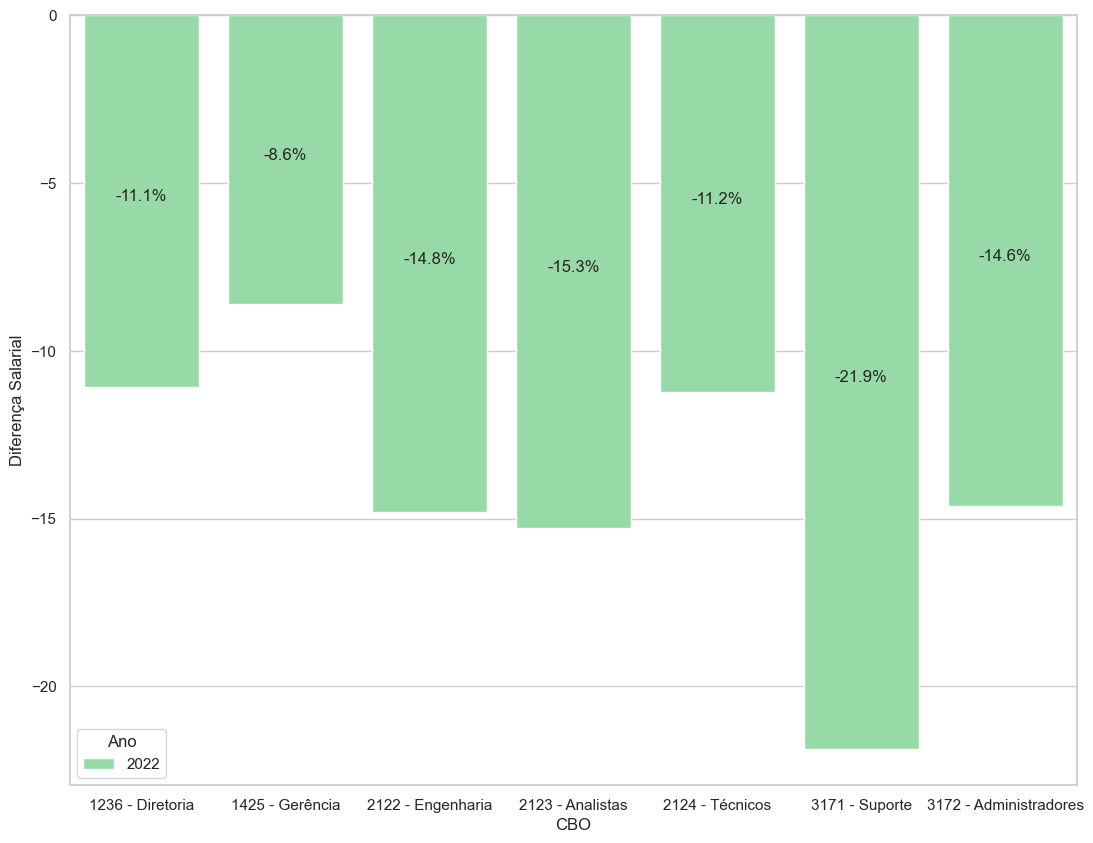

In [89]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "CBO", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2022": color_fem,"2022": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for i, value in enumerate(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"]):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(value), (x, y), ha='center')

plt.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/svg/dif_salarial_sexo_cbo_media.svg")

In [90]:
# Tabela principal para mediana e diferença salarial:
RAIS_GERAL_2022_MEDIANA = pd.crosstab(RAIS_GERAL_2022["CBO"].replace(cbo), RAIS_GERAL_2022["Sexo"].replace(sexo), values = RAIS_GERAL_2022.Remuneração, aggfunc = 'median')
RAIS_GERAL_2022_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2022_MEDIANA["Fem."] - RAIS_GERAL_2022_MEDIANA["Masc."]) / RAIS_GERAL_2022_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2022_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1236 - Diretoria,"27,721.89","29,946.49",-7.43
1425 - Gerência,"13,150.96","14,656.67",-10.27
2122 - Engenharia,"11,445.33","13,903.73",-17.68
2123 - Analistas,"7,114.64","8,689.83",-18.13
2124 - Técnicos,"6,318.94","7,277.71",-13.17
3171 - Suporte,"4,956.14","5,371.32",-7.73
3172 - Administradores,"2,219.01","2,516.79",-11.83


In [91]:
RAIS_GERAL_2022_MEDIANA["Ano"] = "2022"

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2022_MEDIANA]).reset_index()

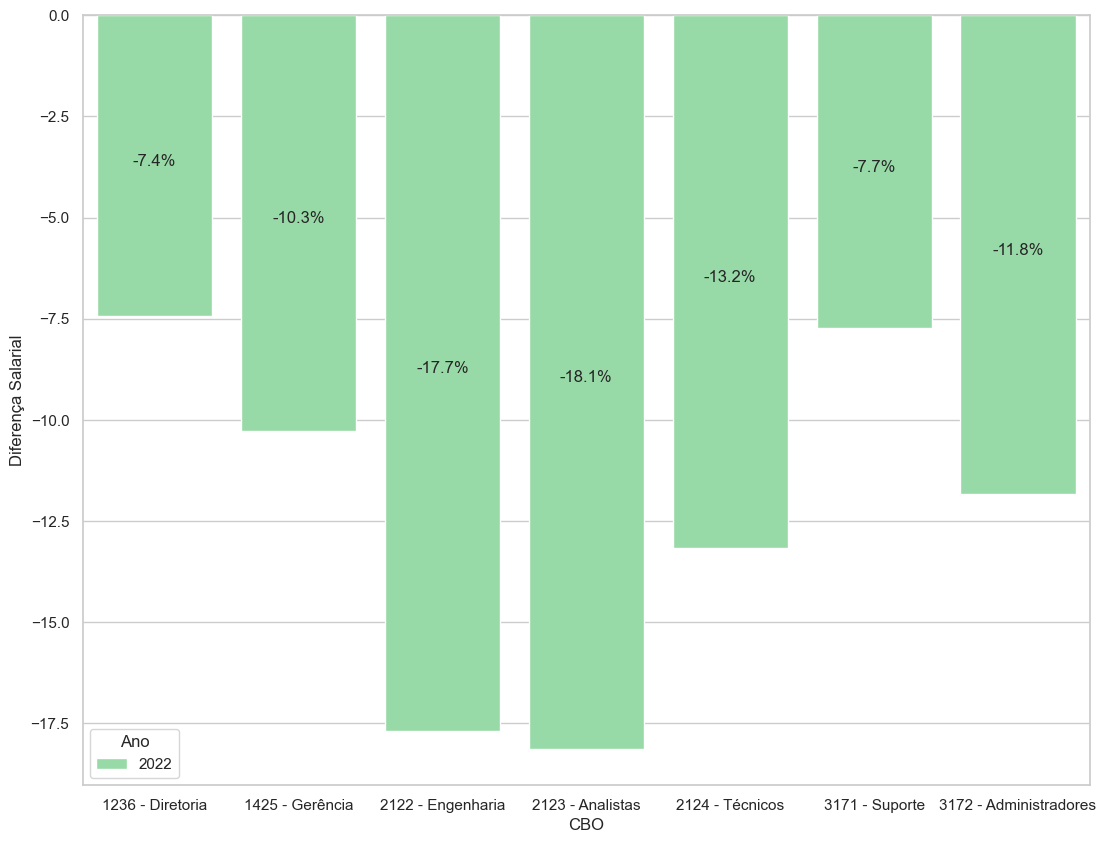

In [92]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "CBO", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2022": color_fem,"2022": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for i, value in enumerate(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"]):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(value), (x, y), ha='center')

plt.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/svg/dif_salarial_sexo_cbo_mediana.svg")

In [93]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [94]:
TESTE_HIP_2022 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for ocup in cbo:
    df1 = RAIS_GERAL_2022.query("Sexo == 'Masc.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    df2 = RAIS_GERAL_2022.query("Sexo == 'Fem.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    
    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2022.loc[cbo[ocup]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2022_HIP = pd.merge(RAIS_GERAL_2022_MEDIA, TESTE_HIP_2022, left_index=True, right_index=True)
RAIS_GERAL_2022_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2022_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2022_HIP.head(7)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
CBO,,,,,
1236 - Diretoria,"28,377.25","31,907.80",689039.5,0.01 > 0.00028...,Medianas estatisticamente diferentes
1425 - Gerência,"14,874.00","16,273.63",396567467.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
2122 - Engenharia,"14,728.72","17,287.43",17716028.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
2123 - Analistas,"8,799.24","10,387.35",101348413.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
2124 - Técnicos,"8,089.60","9,114.30",13642907014.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
3171 - Suporte,"5,386.26","6,892.68",1450016557.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
3172 - Administradores,"2,863.58","3,353.78",821972394.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
